In [38]:
#importing all libraries here for assignment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing,metrics
from sklearn.cluster import KMeans
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Apply Linear Regression to the provided dataset using underlying steps.
# a. Import the given “Salary_Data.csv”
# b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
# c. Train and predict the model.
# d. Calculate the mean_squared error
# e. Visualize both train and test data using scatter plot

In [24]:
dataframe = pd.read_csv('datasets//Salary_Data.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [25]:
dataframe.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [26]:
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
dataframe.corr().style.background_gradient(cmap="Greens")

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


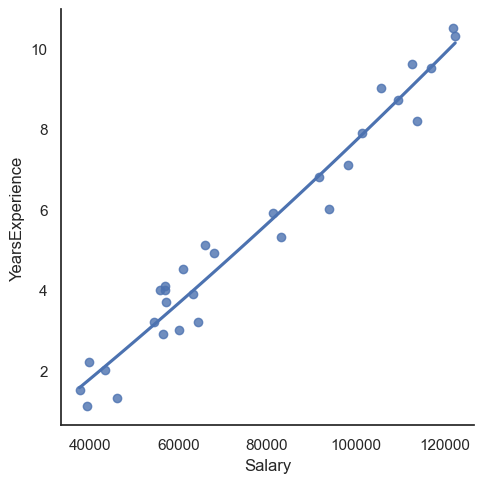

In [27]:
#plotting the Scatter plot to check relationship between Sal and experience
sns.lmplot(x ="Salary", y ="YearsExperience", data = dataframe, order = 2, ci = None)

Score:  0.9676071747884898


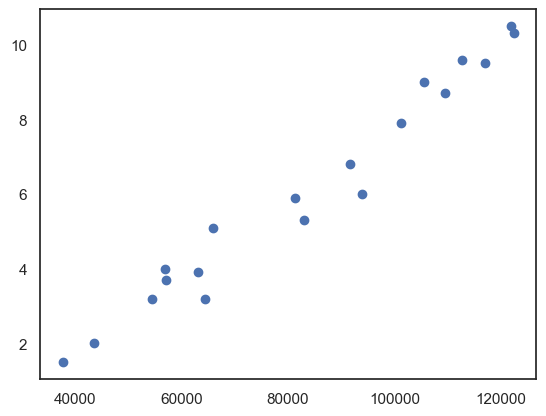

In [28]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
X = np.array(dataframe['Salary']).reshape(-1, 1)
y = np.array(dataframe['YearsExperience']).reshape(-1, 1)
  
# since each dataframe contains only one column
dataframe.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34) #1/3= 0.3333 ~~ 0.34
  
# Splitting the data into training and testing data
linearReg = LinearRegression()
  
linearReg.fit(X_train, y_train)
print("Score: ",linearReg.score(X_train, y_train))
plt.scatter(X_train, y_train, color ='b')
plt.show()

Score:  0.8925165180701997
Score:  1.0


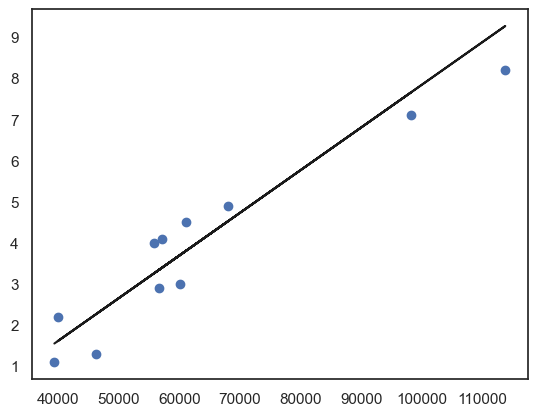

In [29]:
print("Score: ",linearReg.score(X_test, y_test))
y_pred = linearReg.predict(X_test)
# Data scatter of predicted values
print("Score: ",linearReg.score(X_test, y_pred))
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [30]:
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("RMSE(mean_squared_error):",rmse)

mean_absolute_error: 0.6648881696777404
mean_squared_error: 0.48294726822804807
RMSE(mean_squared_error): 0.6949440756118783


In [31]:
# 2. Apply K means clustering in the dataset provided:
# • Remove any null values by the mean.
# • Use the elbow method to find a good number of clusters with the K-Means algorithm
# • Calculate the silhouette score for the above clustering

In [32]:
dataframe1 = pd.read_csv('datasets//K-Mean_Dataset.csv')
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [33]:
dataframe1.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [34]:
dataframe1.fillna(dataframe1.mean(), inplace=True)
dataframe1.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [43]:
dataframe1.corr().style.background_gradient(cmap="Greens")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [35]:
x = dataframe1.iloc[:,1:-1]
y = dataframe1.iloc[:,-1]

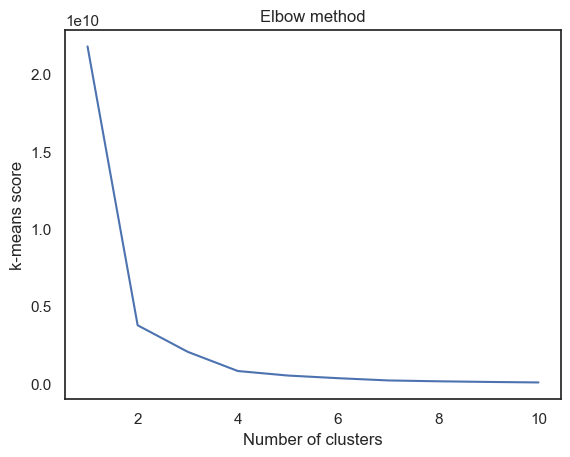

In [39]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('k-means score')
plt.show()

In [41]:
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)

print('Silhouette score for(k=3): ', metrics.silhouette_score(x,y_cluster_kmeans))

Silhouette score:  0.4650447552840422


In [53]:
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)

print('Silhouette score for(k=3): ', metrics.silhouette_score(x,y_cluster_kmeans))

Silhouette score for(k=3):  0.3981383527126704


In [ ]:
# Question 3
# Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
# Yes, can you justify why

In [56]:
#Feature Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

nclusters = 3 # this is the k in kmeans
scaled_km = KMeans(n_clusters=nclusters)
scaled_km.fit(X_scaled)

# predict the cluster for each data point
scaled_y_cluster_kmeans = scaled_km.predict(X_scaled)

print('After Scaling Silhouette score:(k=3) ', metrics.silhouette_score(X_scaled,scaled_y_cluster_kmeans))

After Scaling Silhouette score:(k=3)  0.26728393528907846


In [57]:
#Feature Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

nclusters = 4 # this is the k in kmeans
scaled_km = KMeans(n_clusters=nclusters)
scaled_km.fit(X_scaled)

# predict the cluster for each data point
scaled_y_cluster_kmeans = scaled_km.predict(X_scaled)

print('After Scaling Silhouette score:(k=4) ', metrics.silhouette_score(X_scaled,scaled_y_cluster_kmeans))

After Scaling Silhouette score:(k=4)  0.2166780182534037


In [60]:
"""silhouette score is a metric used to calculate the goodness of a clustering technique, Here score is improved a lot after scaling.
 As K-Means Clustering depends on Euclidean Distance to form the clusters/cohorts, If one of the features would have much larger values than another it would dominate the distance results and the other feature would have a lesser effect on the result even if it changes significantly.
By scaling the features to the same range, the algorithm would be sensitive to all of them and not biased to the features with the greater magnitude."""

'silhouette score is a metric used to calculate the goodness of a clustering technique, Here score is improved a lot after scaling.\n As K-Means Clustering depends on Euclidean Distance to form the clusters/cohorts, If one of the features would have much larger values than another it would dominate the distance results and the other feature would have a lesser effect on the result even if it changes significantly.\nBy scaling the features to the same range, the algorithm would be sensitive to all of them and not biased to the features with the greater magnitude.'